In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/Prodigy/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df=df.drop('CustomerID',axis=1)

In [7]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
df['Gender_Binary'] = lb.fit_transform(df['Gender'])

In [8]:
df = df.drop("Gender",axis=1)

In [9]:
features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)",'Gender_Binary']]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans()
inertia = []
k_range = range(1, 4) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


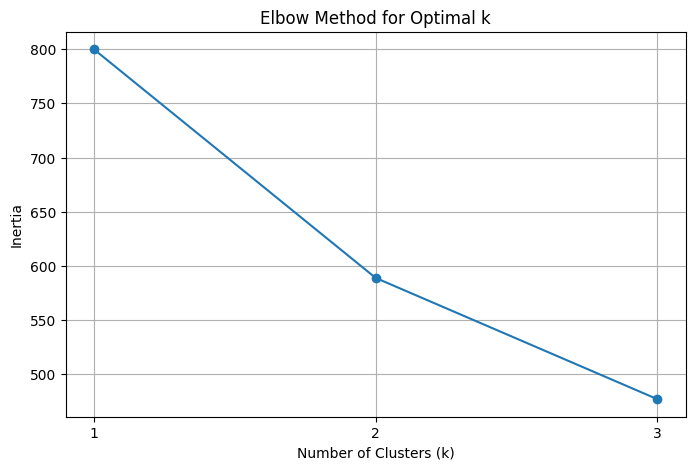

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [13]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df['Cluster'] = clusters

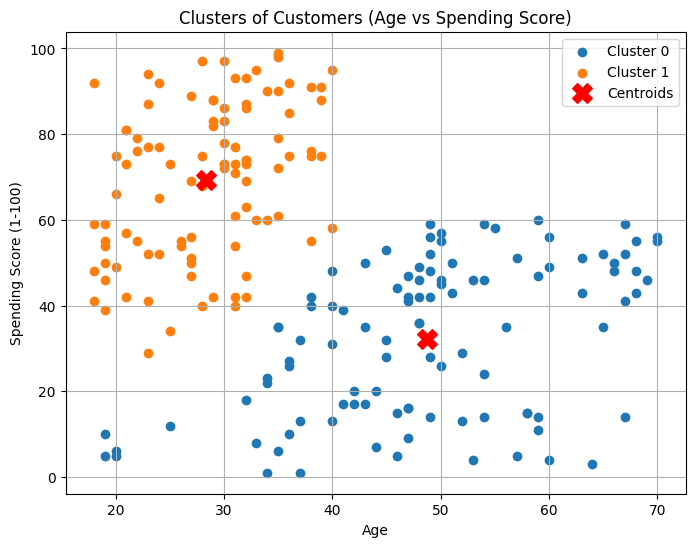

In [15]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], label=f"Cluster {cluster}")

plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 2] * scaler.scale_[2] + scaler.mean_[2],
            s=200, c='red', marker='X', label='Centroids')

plt.title("Clusters of Customers (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()
plt.show()

In [16]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Binary,Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,1
4,31,17,40,0,1
